<h1><i>TASK 3</i></h1>

<h1>Data Input And Visualization</h1>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

In [5]:
df = pd.read_csv('Iris.csv', index_col = ['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica
150,5.9,3.0,5.1,1.8,Iris-virginica


In [8]:
df.shape

(150, 5)

In [10]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
df.describe(include = ['object'])

,Species
count,150
unique,3
top,Iris-setosa
freq,50


In [12]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


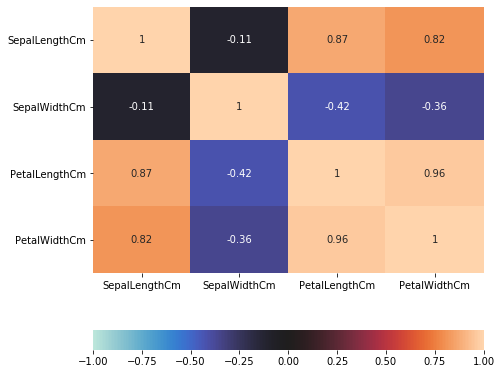

In [15]:
plt.figure(figsize = (7,7))
sns.heatmap(df.corr(), annot = True,vmin=-1, vmax=1, center= 0,cbar_kws= {'orientation': 'horizontal'})

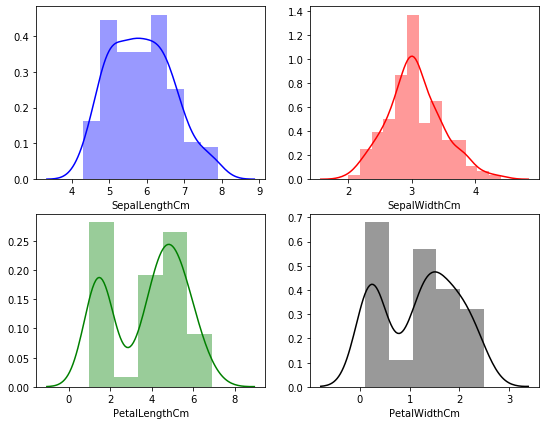

In [23]:
plt.figure(figsize = (9,7))
plt.subplot(2,2,1)
sns.distplot(a = df['SepalLengthCm'], kde = True, color = 'b')
plt.subplot(2,2,2)
sns.distplot(a = df['SepalWidthCm'], kde = True, color = 'r')
plt.subplot(2,2,3)
sns.distplot(a = df['PetalLengthCm'], kde = True, color = 'g')
plt.subplot(2,2,4)
sns.distplot(a = df['PetalWidthCm'], kde = True, color = 'k')
plt.show()

In [25]:
a = df[:50]
b = df[50:100]
c = df[100:]

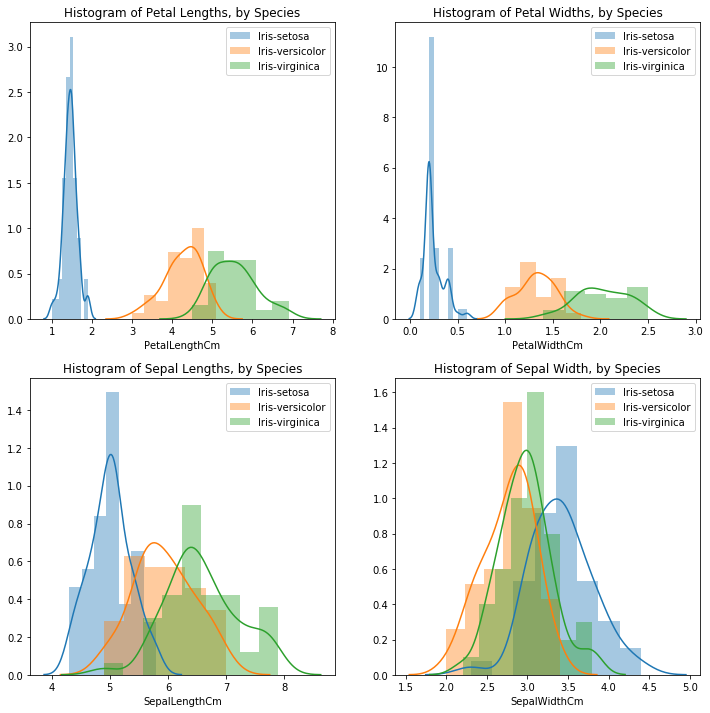

In [30]:
plt.figure(figsize = (12,12))
#petal length
plt.subplot(2,2,1)
sns.distplot(a=a['PetalLengthCm'], label="Iris-setosa", kde=True)
sns.distplot(a=b['PetalLengthCm'], label="Iris-versicolor", kde=True)
sns.distplot(a=c['PetalLengthCm'], label="Iris-virginica", kde=True)
plt.title("Histogram of Petal Lengths, by Species")
plt.legend()
#petal width
plt.subplot(2,2,2)
sns.distplot(a=a['PetalWidthCm'], label="Iris-setosa", kde=True)
sns.distplot(a=b['PetalWidthCm'], label="Iris-versicolor", kde=True)
sns.distplot(a=c['PetalWidthCm'], label="Iris-virginica", kde=True)
plt.title("Histogram of Petal Widths, by Species")
plt.legend()
#sepal length
plt.subplot(2,2,3)
sns.distplot(a=a['SepalLengthCm'], label="Iris-setosa", kde=True)
sns.distplot(a=b['SepalLengthCm'], label="Iris-versicolor", kde=True)
sns.distplot(a=c['SepalLengthCm'], label="Iris-virginica", kde=True)
plt.title("Histogram of Sepal Lengths, by Species")
plt.legend()
#sepal width
plt.subplot(2,2,4)
sns.distplot(a=a['SepalWidthCm'], label="Iris-setosa", kde=True)
sns.distplot(a=b['SepalWidthCm'], label="Iris-versicolor", kde=True)
sns.distplot(a=c['SepalWidthCm'], label="Iris-virginica", kde=True)
plt.title("Histogram of Sepal Width, by Species")
plt.legend()
plt.show()

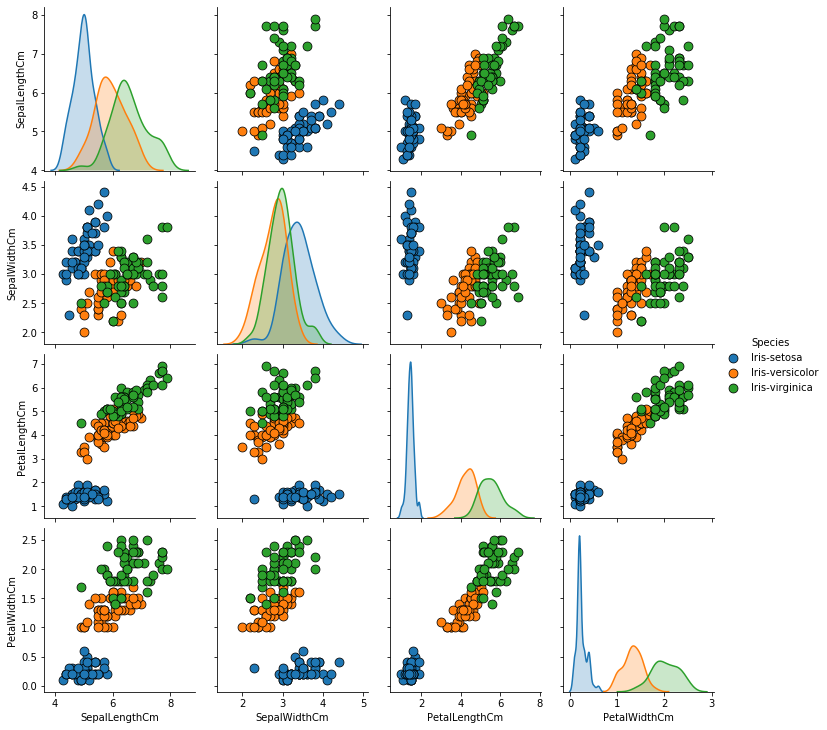

In [45]:
sns.pairplot(df, hue = 'Species',plot_kws = {'alpha': 1, 's': 80, 'edgecolor': 'k'})

In [50]:
X = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values
y = df['Species'].values

In [51]:
#Label Encoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [67]:
y 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [68]:
train_X, val_X,train_y, val_y = train_test_split(X, y, random_state = 42)

<h1>Decision Tree</h1>

1. Define

In [65]:
dt= DecisionTreeClassifier()

2. Fit

In [69]:
dt.fit(train_X, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

3. Predict

In [70]:
predict = dt.predict(val_X)
predict

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

4. Evaluate

In [74]:
#classification report
from sklearn.metrics import classification_report
print('Classification Report of the Model is as follows:\n')
print(classification_report(val_y, predict))

Classification Report of the Model is as follows:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



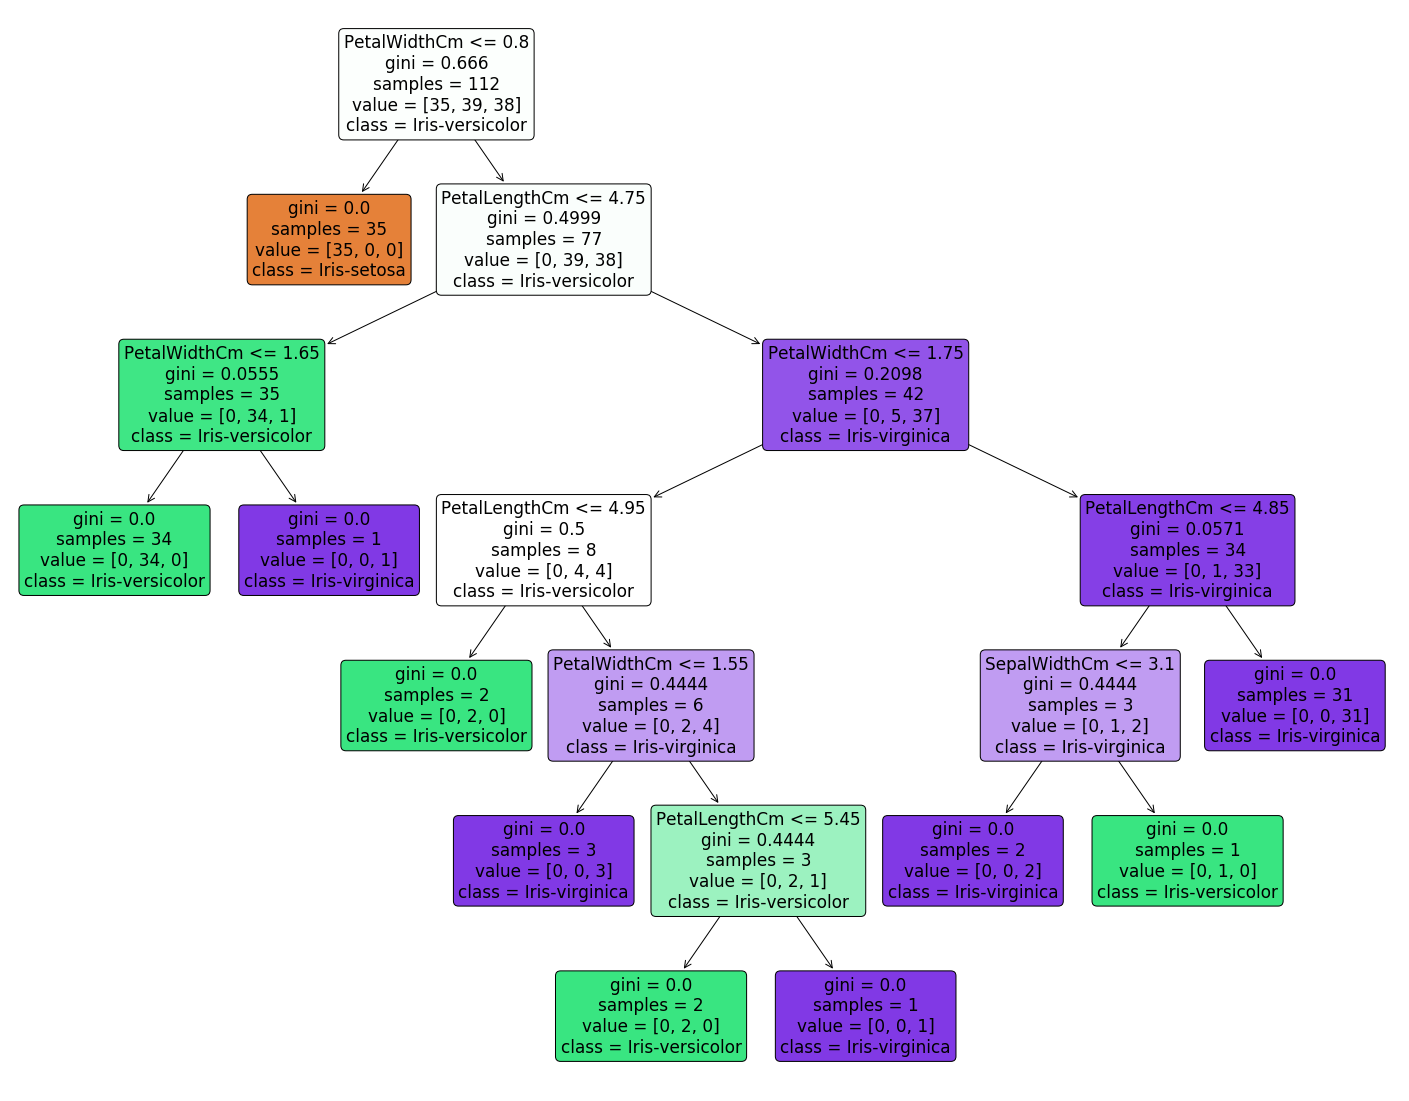

In [76]:
#importing plot_tree
from sklearn.tree import plot_tree

plt.figure(figsize=(25,20))

tree_image = plot_tree(dt,feature_names=df.columns,class_names=df['Species'].unique().tolist(),precision=4,label="all",filled=True,rounded=True)

# plt.savefig('showTree')
plt.show()